# Student Information
### Name:李婉瑄
### Student ID: 105065535

In [1]:
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly.plotly as py
import plotly.graph_objs as go
import math
%matplotlib inline

# my functions
import helpers.data_mining_helpers as dmh
import helpers.text_analysis as ta

### 1. Data source


In [2]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

### Converting Dictionary into Pandas dataframe

In [3]:
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

# Exercise 0 
Experiment with other querying techniques using pandas dataframes. Refer to the their documentation for more information. 

In [4]:
X.head(1)  #check first record

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics


In [5]:
X[-3:]  #check last 3 records

,text,category,category_name
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med
2256,From: dyer@spdcc.com (Steve Dyer) Subject: Re:...,2,sci.med


In [6]:
X.tail(3)  #check last 3 records

,text,category,category_name
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med
2256,From: dyer@spdcc.com (Steve Dyer) Subject: Re:...,2,sci.med


### 4. Data Mining using Pandas

### 4.1 Missing Values

In [7]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text             (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 0)
dtype: object

# Exercise 1
Code for how to calculate the missing values for every record instead of every column. Hint `axis` parameter. Check the documentation for more information.

In [102]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])
result_with_series = X.append(dummy_series, ignore_index=True)

#axis=1 defines that function is to be applied on each row
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
5       (The amoung of missing records is: , 0)
6       (The amoung of missing records is: , 0)
7       (The amoung of missing records is: , 0)
8       (The amoung of missing records is: , 0)
9       (The amoung of missing records is: , 0)
10      (The amoung of missing records is: , 0)
11      (The amoung of missing records is: , 0)
12      (The amoung of missing records is: , 0)
13      (The amoung of missing records is: , 0)
14      (The amoung of missing records is: , 0)
15      (The amoung of missing records is: , 0)
16      (The amoung of missing records is: , 0)
17      (The amoung of missing records is: , 0)
18      (The amoung of missing records is: , 0)
19      (The amoung of missing records is: , 0)
20      (The amoung of missing records i

In [101]:
dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]

X = X.append(dummy_dict,ignore_index=True)

#axis=0 defines that function is to be applied on each column
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=0)

text             (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 2)
unigrams         (The amoung of missing records is: , 1)
dtype: object

### 5.  Data Preprocessing



### 5.1 Sampling

In [13]:
X_sample = X.sample(n=1000)

In [14]:
X_sample[0:4]

,text,category,category_name
486,From: jxl9011@ultb.isc.rit.edu (J.X. Lee) Subj...,1,comp.graphics
1790,From: jhwitten@cs.ruu.nl (Jurriaan Wittenberg)...,1,comp.graphics
2031,"From: haston@utkvx.utk.edu (Haston, Donald Way...",1,comp.graphics
50,From: ab@nova.cc.purdue.edu (Allen B) Subject:...,1,comp.graphics


In [15]:
X_category_counts = ta.get_tokens_and_frequency(list(X.category_name))
X_sample_category_counts = ta.get_tokens_and_frequency(list(X_sample.category_name))

# Exercise 2
We can also do a side by side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Look at the [Plotly documents](https://plot.ly/python/bar-charts/) for tons of examples and ways to visualizing **groups bar charts.** 

In [16]:
#change it to a horizontal one
def plot_word_frequency2(word_list, plot_title):
    trace0 = go.Bar(
        x=list(word_list[1]),
        y=list(word_list[0]),
        orientation = 'h',  #改為水平柱狀圖
            marker=dict(
            color='rgb(0,190,0)'
        )
        ,opacity=0.6 
    )

    data = [trace0]
    layout = go.Layout(
        title= plot_title,
    )

    fig = go.Figure(data=data, layout=layout)
    return fig

py.iplot(plot_word_frequency2(X_sample_category_counts, "Category distribution"))

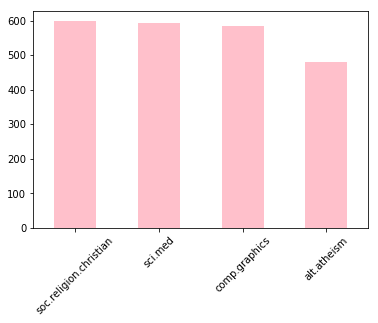

In [17]:
X.category_name.value_counts().plot(kind="bar", rot=45, color='pink')

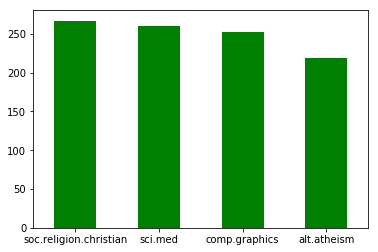

In [103]:
X_sample.category_name.value_counts().plot(kind="bar", rot=0, color='green')

### 5.2 Feature Creation


In [19]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [20]:
list(X[0:1]['unigrams'])

[['From',
  ':',
  'sd345',
  '@',
  'city.ac.uk',
  '(',
  'Michael',
  'Collier',
  ')',
  'Subject',
  ':',
  'Converting',
  'images',
  'to',
  'HP',
  'LaserJet',
  'III',
  '?',
  'Nntp-Posting-Host',
  ':',
  'hampton',
  'Organization',
  ':',
  'The',
  'City',
  'University',
  'Lines',
  ':',
  '14',
  'Does',
  'anyone',
  'know',
  'of',
  'a',
  'good',
  'way',
  '(',
  'standard',
  'PC',
  'application/PD',
  'utility',
  ')',
  'to',
  'convert',
  'tif/img/tga',
  'files',
  'into',
  'LaserJet',
  'III',
  'format',
  '.',
  'We',
  'would',
  'also',
  'like',
  'to',
  'do',
  'the',
  'same',
  ',',
  'converting',
  'to',
  'HPGL',
  '(',
  'HP',
  'plotter',
  ')',
  'files',
  '.',
  'Please',
  'email',
  'any',
  'response',
  '.',
  'Is',
  'this',
  'the',
  'correct',
  'group',
  '?',
  'Thanks',
  'in',
  'advance',
  '.',
  'Michael',
  '.',
  '--',
  'Michael',
  'Collier',
  '(',
  'Programmer',
  ')',
  'The',
  'Computer',
  'Unit',
  ',',
  'Emai

### 5.3 Feature subset selection


In [21]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
analyze = count_vect.build_analyzer()
analyze(" ".join(list(X[4:5].text)))

" ".join(list(X[4:5].text))

# We can obtain the feature names of the vectorizer, i.e., the terms
count_vect.get_feature_names()[0:10]

['00',
 '000',
 '0000',
 '0000001200',
 '000005102000',
 '0001',
 '000100255pixel',
 '00014',
 '000406',
 '0007']

# Exercise 3
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it.

In [22]:
X_counts[0:6,0:100].toarray()

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:]]
plot_z = X_counts[0:100, 0:100].toarray()

# to plot
py.iplot(ta.plot_heat_map(plot_x, plot_y, plot_z))

---

### 5.4 Dimensionality Reduction


In [23]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components=3).fit_transform(X_counts.toarray())

trace1 = ta.get_trace(X_reduced, X["category_name"], "alt.atheism", "rgb(71,233,163)")
trace2 = ta.get_trace(X_reduced, X["category_name"], "soc.religion.christian", "rgb(52,133,252)")
trace3 = ta.get_trace(X_reduced, X["category_name"], "comp.graphics", "rgb(229,65,136)")
trace4 = ta.get_trace(X_reduced, X["category_name"], "sci.med", "rgb(99,151,68)")

data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

### 5.5 Atrribute Transformation / Aggregation

# Exercise 4
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. You can try to reduce the number of terms you want to visualize as an exercise. 

In [47]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
    
py.iplot(plot_word_frequency2([count_vect.get_feature_names()[-60:], term_frequencies], "Term Frequency Distribution"))

The draw time for this plot will be slow for clients without much RAM.


C:\Users\asus\Anaconda3\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Slow



# Exercise 5
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order.

In [200]:
(pd.Series(term_frequencies)).sort_values()[-3:]

32494    [17222]
23611    [17660]
32143    [29825]
dtype: object

In [194]:
a=(pd.Series(term_frequencies)).sort_values()

In [206]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
    
#a = sorted('term_frequencies')
data = [go.Bar(
            x=count_vect.get_feature_names()[-60:],
            y=(pd.Series(term_frequencies)).sort_values()[-100:]
    #y=term_frequencies,
    )]



py.iplot(data)


In [168]:
import plotly 
plotly.tools.set_credentials_file(username='WanHsuanLee', api_key='ZfWKgCAJ52Yq0riS7yAp')